In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

In [5]:
img = cv2.imread('test_images/messi1.png')
img.shape

(500, 500, 3)

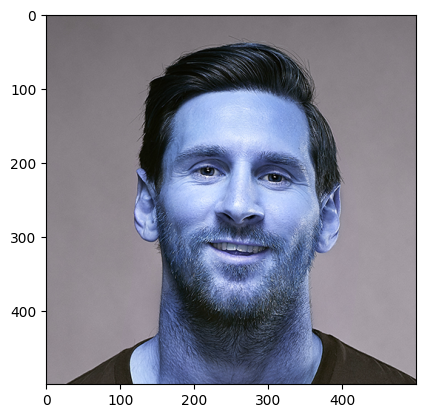

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

In [8]:
gray 

array([[104, 101, 101, ..., 118, 118, 117],
       [103, 103, 104, ..., 119, 121, 119],
       [105, 105, 103, ..., 120, 119, 121],
       ...,
       [142, 146, 145, ...,  39,  71,  75],
       [150, 146, 146, ...,  41,  40,  59],
       [147, 149, 149, ...,  42,  40,  39]], dtype=uint8)

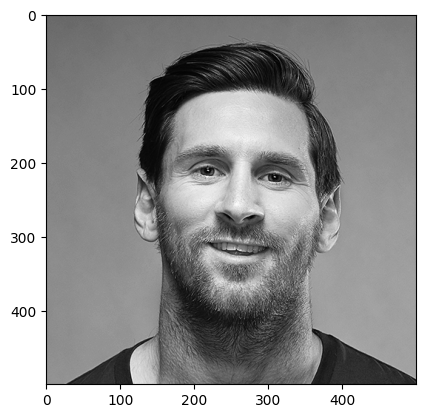

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [11]:
(x, y, w, h) = faces[0]
x, y, w, h

(120, 101, 278, 278)

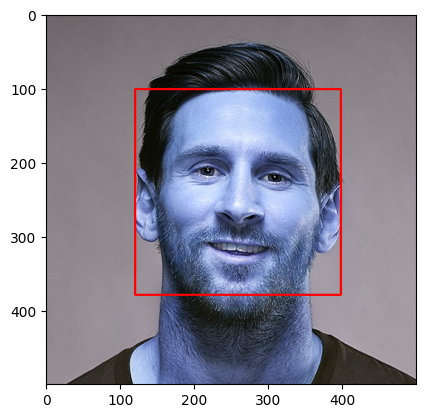

In [12]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

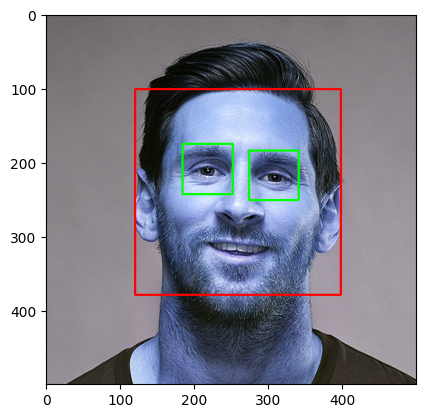

In [13]:
cv2.destroyAllWindows()
for(x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

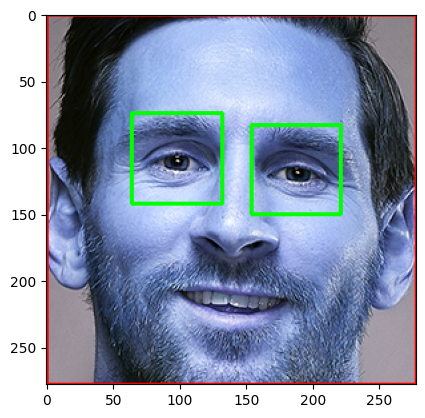

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(278, 278, 3)

In [16]:
import numpy as np
import pywt # Needed for Wavelet Transformation
import cv2

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

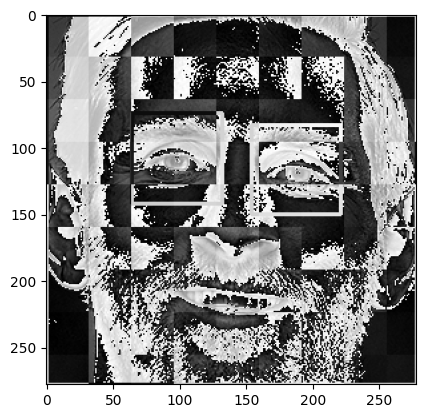

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    # Read the image from the passsed image path
    img = cv2.imread(image_path)
    # Convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color

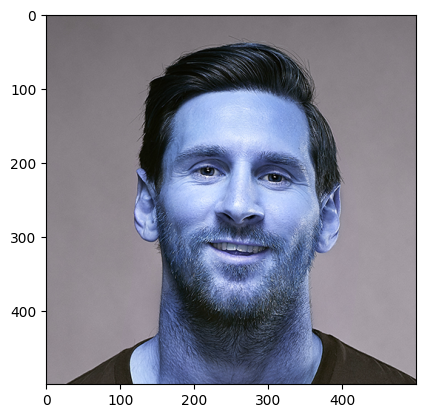

In [19]:
original_image = cv2.imread('./test_images/messi1.png')
plt.imshow(original_image)

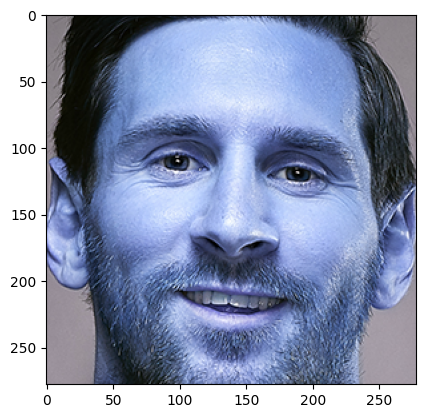

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/messi1.png')
plt.imshow(cropped_image)

In [21]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [36]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [37]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [38]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [39]:
import shutil
# if the cropped folder already exists, then remove it
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
# Else create a new folder called cropped that's it!!
os.mkdir(path_to_cr_data)

In [34]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [46]:
value=celebrity_file_names_dict.pop('cropped',None)

In [50]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [47]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [53]:
import os

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        # Check if the file path exists
        if not os.path.exists(training_image):
            print(f"File path does not exist: {training_image}")
        else:
            # Attempt to read the image
            img = cv2.imread(training_image)
            if img is None:
                print(f"Image is empty or could not be loaded: {training_image}")


File path does not exist: ./dataset/cropped/lionel_messi/lionel_messi12.png
File path does not exist: ./dataset/cropped/lionel_messi/lionel_messi21.png
File path does not exist: ./dataset/cropped/lionel_messi/lionel_messi31.png
File path does not exist: ./dataset/cropped/maria_sharapova/maria_sharapova1.png
File path does not exist: ./dataset/cropped/maria_sharapova/maria_sharapova3.png
File path does not exist: ./dataset/cropped/roger_federer/roger_federer26.png
File path does not exist: ./dataset/cropped/roger_federer/roger_federer27.png
File path does not exist: ./dataset/cropped/serena_williams/serena_williams1.png
File path does not exist: ./dataset/cropped/serena_williams/serena_williams5.png
File path does not exist: ./dataset/cropped/serena_williams/serena_williams11.png
File path does not exist: ./dataset/cropped/serena_williams/serena_williams18.png
File path does not exist: ./dataset/cropped/serena_williams/serena_williams19.png
File path does not exist: ./dataset/cropped/se

In [55]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [56]:
len(X)

163

In [57]:
len(y)

163

In [58]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [59]:
y[0]

0

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(163, 4096)

In [61]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [62]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state = 0)

In [63]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8780487804878049

In [64]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.91      0.91      0.91        11
           2       1.00      0.71      0.83         7
           3       0.50      0.75      0.60         4
           4       0.92      1.00      0.96        12

    accuracy                           0.88        41
   macro avg       0.87      0.85      0.85        41
weighted avg       0.90      0.88      0.88        41



In [65]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [66]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [67]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\vishe\AppData\Local\Programs\Python\P

,model,best_score,best_params
0,svm,0.820000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.729667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.852667,{'logisticregression__C': 10}


In [68]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, multi_class='auto',
                                     solver='liblinear'))])}

In [69]:
best_estimators['svm'].score(X_test,y_test)

0.8780487804878049

In [70]:
best_estimators['random_forest'].score(X_test,y_test)

0.8048780487804879

In [71]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9024390243902439

In [72]:
best_clf = best_estimators['svm']

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  1],
       [ 0,  0,  5,  2,  0],
       [ 0,  1,  0,  3,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

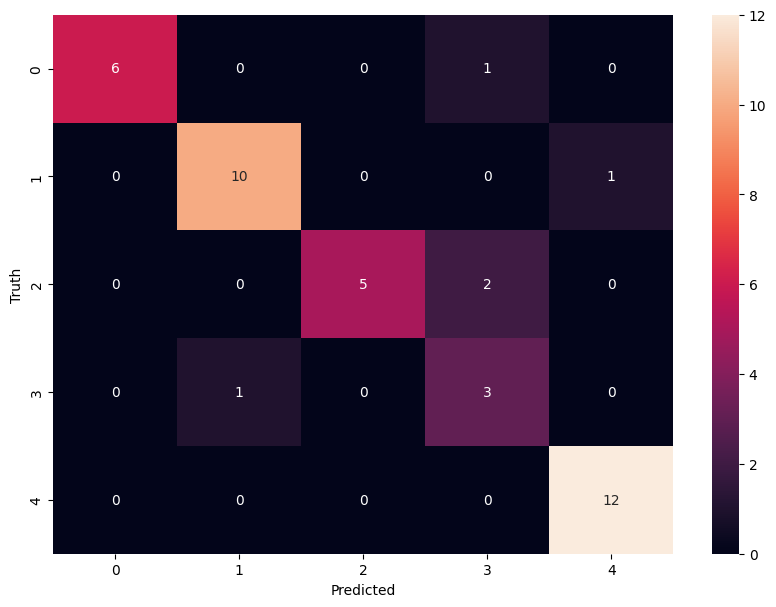

In [74]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [76]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [77]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))